In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['legend.fontsize'] = 'large'

In [3]:
dffull = pd.read_csv('../data/religion.csv')
dffull.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


In [4]:
x = dffull.rfrac.values
f = dffull.promney.values

Let x be the fraction of religious people in a country and y be the probability of voting for Romney as a function of x. 

This data set was built by pollsers. Hence, there is a margin of error on each data point. But we will ignore it for now.

In [6]:
df = pd.read_csv('../data/noisysample.csv')
df.head()

,x,f,y,i
0,0.04,0.062597,0.036211,4
1,0.11,0.096800,0.194625,11
2,0.16,0.128537,0.072212,16
3,0.18,0.143061,0.109693,18
4,0.27,0.221640,0.413717,27


In [10]:
from sklearn.model_selection import train_test_split
datasize=df.shape[0]
#split dataset using the index, as we have x,f, and y that we want to split.
itrain,itest = train_test_split(range(30),train_size=24, test_size=6)
xtrain= df.x[itrain].values
ftrain = df.f[itrain].values
ytrain = df.y[itrain].values
xtest= df.x[itest].values
ftest = df.f[itest].values
ytest = df.y[itest].values

# Validation
Since we use the test set to pick out the best degree d for our polynomial, we use test set as the training data for the **hyperparameter** d of the model.

In this case, the test-set errror will underestimate the true out-of-sample error. Furthermore, we have the **contaminated the test set** by fitting for d on it; it is no longer a true test set.

Thus we introduce a new validation set on which the complexity of parameter d is fit, and leave out a test set which can use to estimate the true out-of-sample performance of our learner. The place of this set in the schema of thins is shown below:

![validation](gfx/train-validate-test.png)

Then we proceed with the fitting of hyperparameter d as follows. 

![training](gfx/train-validate-test-cont.png)

Or expanding the looping for each hypothesis in hypothesis space.
![validation2](gfx/train-validate-test3.png)

Note that last step (after picking the best degree $d^*$), we fit the model using the entire training set. We now compute the test error on the test set as an estimate of the test risk $\epsilon_{test}$

In summary, the **validation** set is the set on which the hyperparameter is fit. This method of splitting the data $\cal{D}$ is called the **train-validate-test** split.

# Properties of the validation test

Again using Hoeffding bound we can show that the validation risk or error is an unbiased estimate of the out of sample risk.

Write sth more here about the combination of degree d and the particular polynomial g.

## Working it out

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
def make_features(train_set, test_set, degrees):
    traintestlist=[]
    for d in degrees:
        traintestdict={}
        traintestdict['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1,1))
        traintestdict['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1,1))
        traintestlist.append(traintestdict)
    return traintestlist

In [14]:
#we split the training set down further
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

In [19]:
degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

1


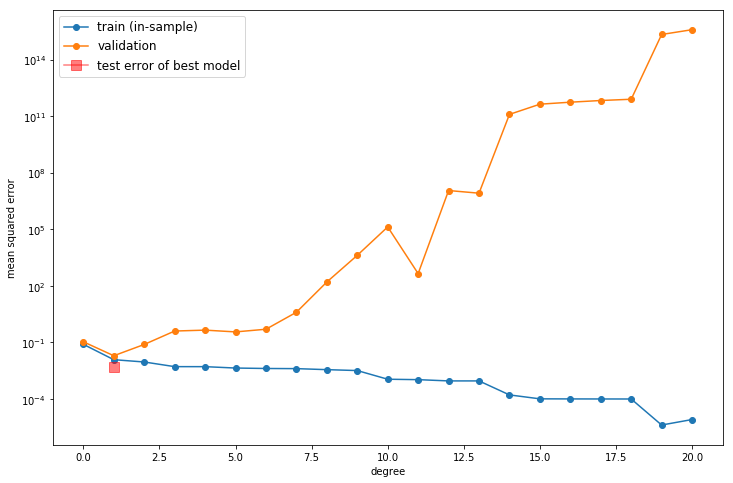

In [21]:
#we now train on the smaller training set
for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    #fit a model linear in polynomial coefficients on the new smaller training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    #predict on new training and validation sets and calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

#calculate the degree at which validation error is minimized
mindeg = np.argmin(error_valid)
#need to remake polynomial features on the whole training set
ttlist=make_features(xtrain, xtest, degrees)
features_at_mindeg = ttlist[mindeg]['train']
test_features_at_mindeg = ttlist[mindeg]['test']
#fit on whole training set now. Put MSE in variable err.
#your code here
clf = LinearRegression()
clf.fit(features_at_mindeg, ytrain) # fit
#predict on the test set now and calculate error
pred = clf.predict(test_features_at_mindeg)
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test error of best model', alpha=0.5, color='r')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
print(mindeg)

We do this again, choosing a new random split between training and validation data

5


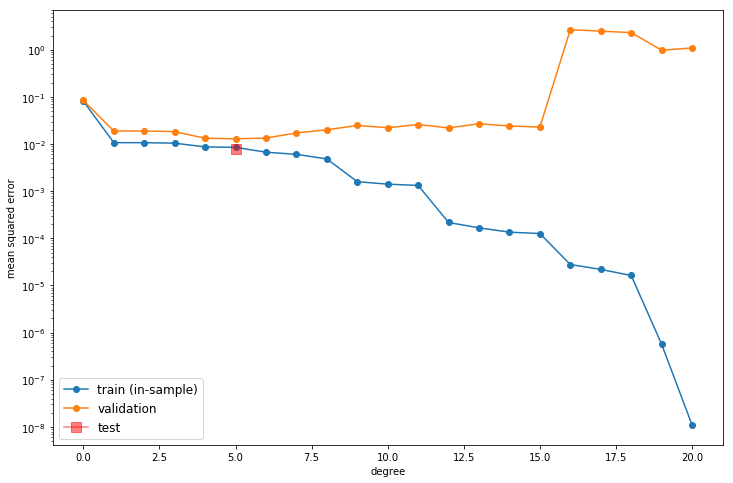

In [24]:
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    #fit a model linear in polynomial coefficients on the training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    #calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

mindeg = np.argmin(error_valid)
ttlist=make_features(xtrain, xtest, degrees)
features_at_mindeg = ttlist[mindeg]['train']
test_features_at_mindeg = ttlist[mindeg]['test']
clf = LinearRegression()
clf.fit(features_at_mindeg, ytrain) # fit
pred = clf.predict(test_features_at_mindeg)
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')

plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='lower left')
plt.yscale("log")
print(mindeg)

This time the validation error minimizing polynomial degree might change! What happened?

# Cross Validation

As we see the problem is that every time we randomly split the training set into a smaller training set and validation set, we may have a different optimal hyperparameter. We have the following problem with **train-validate-test** split approach.

1. Random spliting may accidently expose us to a pecularity of data. Hence, we want to average over multiple splits to find the ''best'' validation minimizing polynomial degree or complexity d.

2. Multiple splits also provides us a distribution of our prediction error. Then we can see whether our error predicition is consistent. 

3. Trade off between size of training set and validation set.

## The idea

So the multiple splits idea gives rise to the process called **cross validation**

![cross validation](gfx/train-cv2.png)


Let's us explain this process. Given a hypothesis set $\cal{H}_a$ with complexity parameter d=a. We do the train/validate split, not once but multiple times

Each time is called a fold. Note that the number of times equal to the number of fold.

For each fold, after training the model, we calculate the risk or error on the reamining one validation part.

We compute average of this error over all folds.

Under some conditions (to be specified later), **cross-validation error is an unbiased estimate of the out of sample error.**

**cross-validation** is a re-sampling method.

## Putting things together: K-fold cross-validation

![kfold-cross](gfx/train-cv3.png)

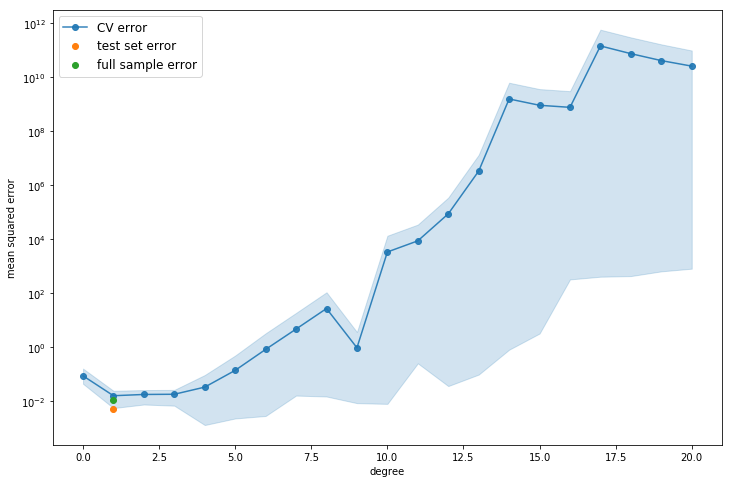

In [32]:
from sklearn.cross_validation import KFold
n_folds=4
degrees=range(21)
results=[]
for d in degrees:
    hypothesisresults=[]
    for train, test in KFold(24, n_folds): # split data into train/test groups, 4 times
        tvlist=make_features(xtrain[train], xtrain[test], degrees)
        clf = LinearRegression()
        clf.fit(tvlist[d]['train'], ytrain[train]) # fit
        hypothesisresults.append(mean_squared_error(ytrain[test], clf.predict(tvlist[d]['test']))) # evaluate score function on held-out data
    results.append((np.mean(hypothesisresults), np.min(hypothesisresults), np.max(hypothesisresults), np.std(hypothesisresults))) # average

mindeg = np.argmin([r[0] for r in results])
ttlist=make_features(xtrain, xtest, degrees)

#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(pred, ytest)
errtr=mean_squared_error(ytrain, clf.predict(ttlist[mindeg]['train']))
errout=0.8*errtr+0.2*err
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
plt.plot(degrees, [r[0] for r in results], marker='o', label='CV error', alpha=0.9)
plt.fill_between(degrees, [r[1] for r in results], [r[2] for r in results], color=c0, alpha=0.2)


plt.plot([mindeg], [err], 'o',  label='test set error')
plt.plot([mindeg], [errout], 'o',  label='full sample error')


plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

In [30]:
xtrain.shape

(24,)